In [6]:
import sklearn
from sklearn.manifold import TSNE
import os
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib notebook

allFiles = glob.glob(os.path.join("*.txt"))


np_array_list = []
column_names = []
column = []
for file_ in allFiles:
    if re.search(r"AB144[258]", file_):
        df = pd.read_csv(file_,index_col=None, header=0, sep="\t")
        df.loc[len(df) + 1] = [1 + 0*x for x in range(len(df.iloc[1]))]
        np_array_list.append(df.as_matrix())
        column_names.append(list(df))
        rows = list(df.index)
    if re.search(r"AB144[346]", file_):
        df = pd.read_csv(file_,index_col=None, header=0, sep="\t")
        df.loc[len(df) + 1] = [2 + 0*x for x in range(len(df.iloc[1]))]
        np_array_list.append(df.as_matrix())    
        column_names.append(list(df))
        rows = list(df.index)
    
    

for z in column_names:
    for i in z:
        column.append(i)

comb_np_array = np.hstack(np_array_list)
gene_df = pd.DataFrame(comb_np_array)
gene_df = gene_df.T

gene_df.columns = rows 
gene_df.index = column


gene_df["new_column"] = pd.Series(range(len(gene_df)))
gene_count = len(gene_df["new_column"])
del gene_df["new_column"]


In [7]:
gene18 = gene_df[["Cd79b", "Cst7", "S100a9", "Trbc2", "S100a4", "Cd163", "Lpl", "Camp", "P2ry12", "Cst3", "Hexb", "Nkg7", "Rag1", "Cd74",
        "Mrc1", "Ctsd", "Cd9", "Cx3cr1"]]

In [8]:
gene18["new_column"] = pd.Series(range(len(gene18)))
gene_count1 = len(gene18["new_column"])
del gene18["new_column"]



C:\Users\Polina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
gene18[34017] = gene_df[34017]


C:\Users\Polina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
X = np.vstack([gene_df.iloc[i] for i in range(gene_count)])
Y = np.hstack([gene_df[i] for i in gene_df.iloc[0].keys()])


In [14]:
X = np.vstack([gene18.iloc[i] for i in range(gene_count1)])
Y = np.hstack([gene18[i] for i in gene18.iloc[0].keys()])


In [15]:
digits = TSNE(random_state=0, n_components=2).fit_transform(X)

<IPython.core.display.Javascript object>


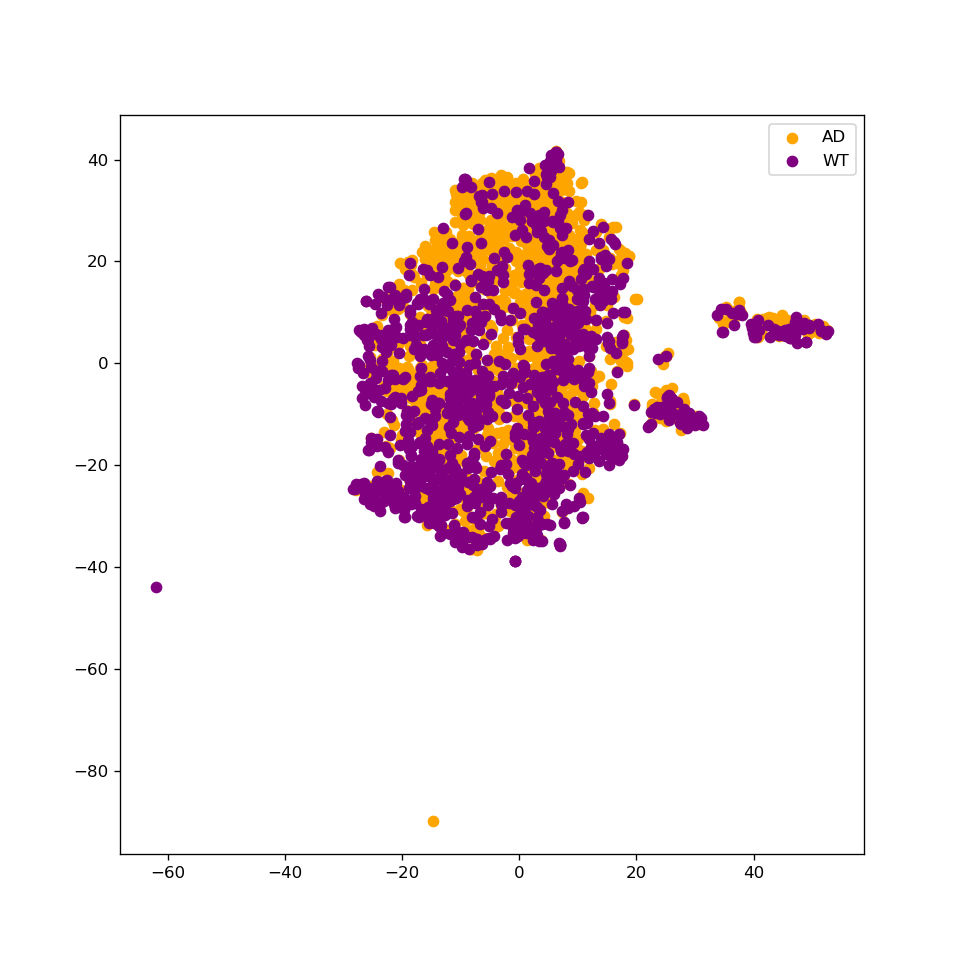

In [13]:
target_ids = range(1, len(gene_df[34017]))
y = np.hstack([gene_df[34017][gene_df[34017] == i] for i in [1, 2]])

from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
colors = 'orange', 'purple' #в зависимости от количества типов нужно задать количество цветов

for i, c, label in zip(target_ids, colors, ["AD", "WT"]):
    plt.scatter(digits[y == i, 0], digits[y == i, 1], c=c, label=label) 
    #в качестве у должен подаваться вектор из чисел, вектор из строк он не признает
plt.legend()
plt.show()
plt.savefig('digi6.png', dpi=500)

<IPython.core.display.Javascript object>


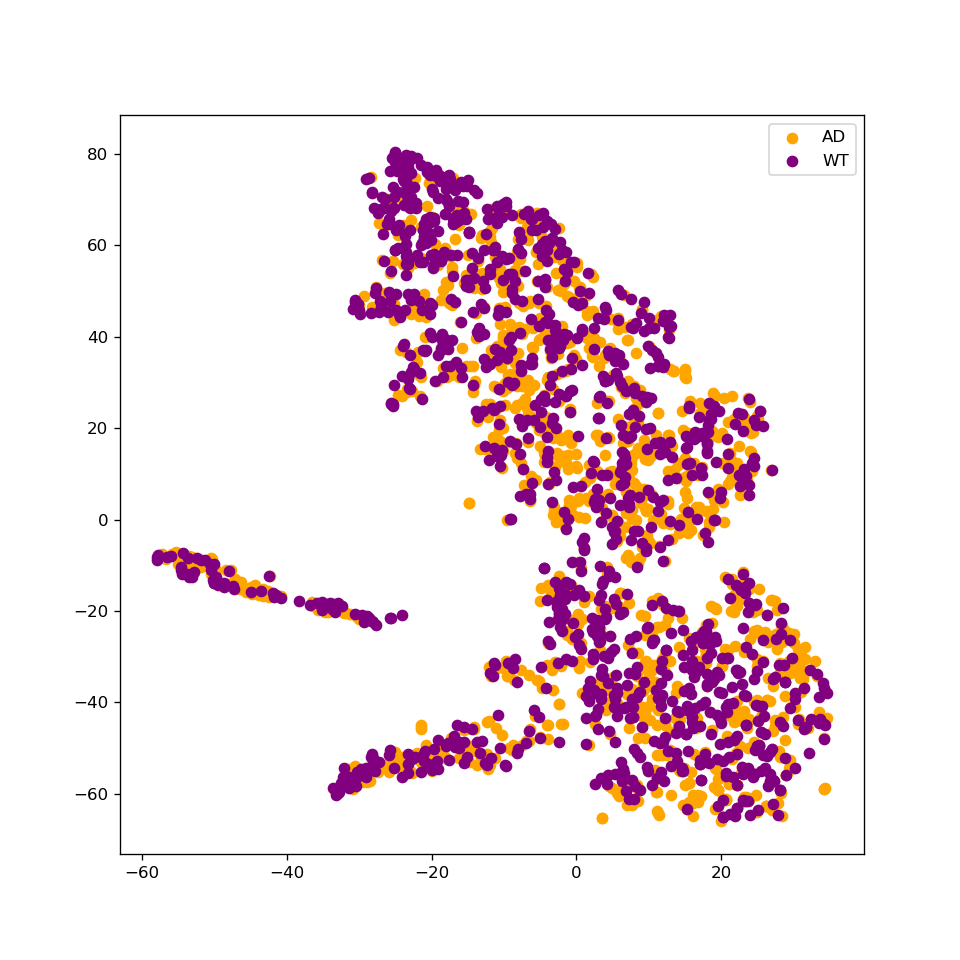

In [20]:
target_ids = range(1, len(gene18[34017]))
y = np.hstack([gene18[34017][gene18[34017] == i] for i in [1, 2]])

from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
colors = 'orange', 'purple' #в зависимости от количества типов нужно задать количество цветов

for i, c, label in zip(target_ids, colors, ["AD", "WT"]):
    plt.scatter(digits[y == i, 0], digits[y == i, 1], c=c, label=label) 
    #в качестве у должен подаваться вектор из чисел, вектор из строк он не признает
plt.legend()
plt.show()
plt.savefig('digi618.png', dpi=500)

<IPython.core.display.Javascript object>


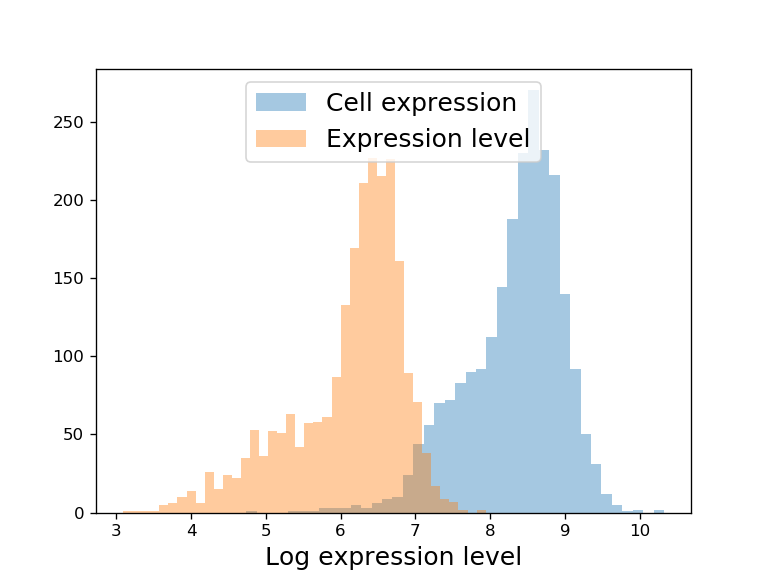

In [30]:
%matplotlib notebook
gene_df = gene_df.T
gene_df["new_column"] = pd.Series(range(len(gene_df)))
gene_count = len(gene_df["new_column"])
del gene_df["new_column"]
cell_count = len(gene_df.iloc[1])
level_exp = (sum(gene_df.iloc[i]) for i in range(gene_count))
gene_df["expression level"] = list(level_exp)

me = gene_df["expression level"][gene_df["expression level"] != 0]
cell_exp = (len(gene_df.iloc[i][gene_df.iloc[i] != 0]) - 1 for i in range(gene_count))
gene_df["Cell expression"] = list(cell_exp)
fd = gene_df["Cell expression"][gene_df["Cell expression"] != 0] - 1
sns.distplot(np.log(me), kde=False, bins=40) 
sns.distplot(np.log(fd), kde=False, bins=40) 
plt.legend(["Cell expression", "Expression level"], loc="upper center", prop={'size': 15})
plt.xlabel("Log expression level", size=15)
plt.show()
plt.savefig('levelsgen.png', dpi=500)

<IPython.core.display.Javascript object>


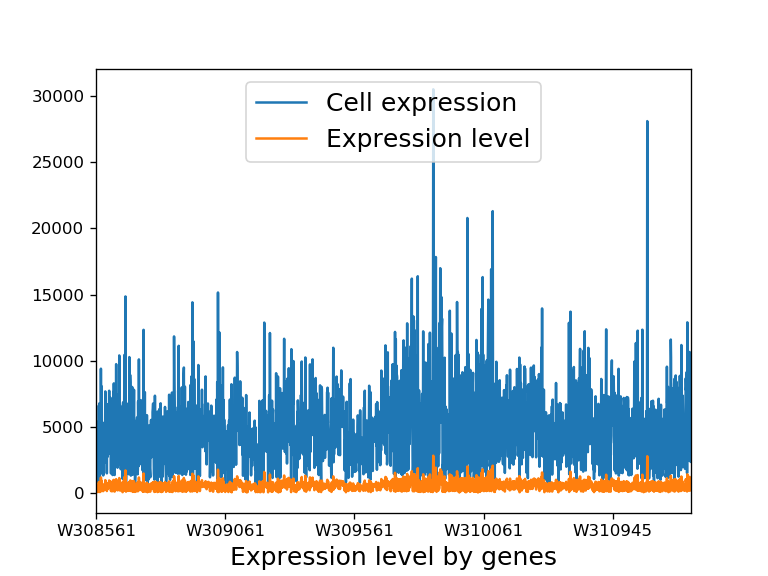

In [33]:
%matplotlib notebook
me.plot()
fd.plot()
plt.legend(["Cell expression", "Expression level"], loc="upper center", prop={'size': 15})
plt.xlabel("Expression level by genes", size=15)
plt.savefig('levelsgene1.png', dpi=500)

<IPython.core.display.Javascript object>


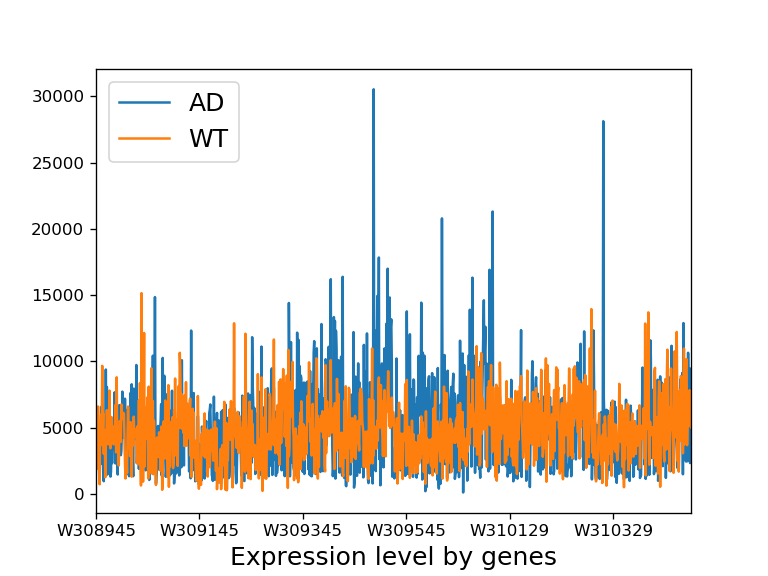

In [49]:
AD = gene_df[gene_df[34017] == 1]
WT = gene_df[gene_df[34017] == 2]
%matplotlib notebook
me2 = AD["expression level"][AD["expression level"] != 0]
me1 = WT["expression level"][WT["expression level"] != 0]
me2.plot()
me1.plot()
plt.legend(["AD", "WT"], prop={'size': 15})
plt.xlabel("Expression level by genes", size=15)
plt.savefig('levelsADWT.png', dpi=500)

<IPython.core.display.Javascript object>


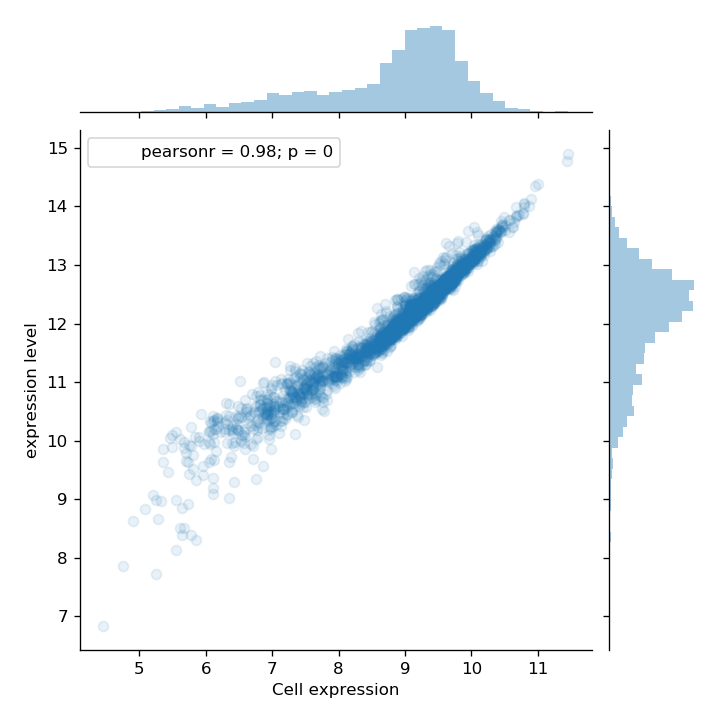

In [32]:
%matplotlib notebook
sns.jointplot(np.log2(fd), np.log2(me),kind="scatter", alpha=0.1) 
plt.savefig('exp1.png', dpi=500)